In [618]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px 


In [626]:
df=pd.read_csv('genres_v2.csv')

In [632]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre'],
      dtype='object')

In [631]:
df=df.drop(['Unnamed: 0', 'id','uri', 'track_href', 'analysis_url','song_name', 'Unnamed: 0', 'title','type','time_signature'],axis=1)

In [649]:
df.genre.unique()

array(['Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'techno', 'trance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

# EDA

## Clustering

In [647]:
# df=df[df['genre']!='psytrance']

In [644]:
# df=df.replace('Hiphop','Pop')

Pop           3489
trance        2999
trap          2987
dnb           2966
techno        2956
hardstyle     2936
RnB           2099
Trap Metal    1956
Rap           1848
Emo           1680
Name: genre, dtype: int64

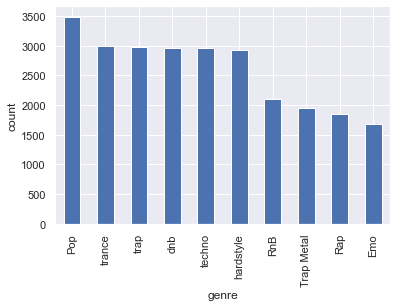

In [648]:
pd.value_counts(df['genre']).plot.bar()
plt.xlabel('genre')
plt.ylabel('count')
df['genre'].value_counts()

In [650]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                             ('kmeans', KMeans(n_clusters=5))])
X = df.select_dtypes(np.number)
cluster_pipeline.fit(X)
df['cluster'] = cluster_pipeline.predict(X)

In [651]:
df.cluster.unique()

array([3, 4, 2, 0, 1], dtype=int32)

In [559]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = df['genre']
projection['cluster'] = df['cluster']

# 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28891 samples in 0.034s...
[t-SNE] Computed neighbors for 28891 samples in 14.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28891
[t-SNE] Computed conditional probabilities for sample 2000 / 28891
[t-SNE] Computed conditional probabilities for sample 3000 / 28891
[t-SNE] Computed conditional probabilities for sample 4000 / 28891
[t-SNE] Computed conditional probabilities for sample 5000 / 28891
[t-SNE] Computed conditional probabilities for sample 6000 / 28891
[t-SNE] Computed conditional probabilities for sample 7000 / 28891
[t-SNE] Computed conditional probabilities for sample 8000 / 28891
[t-SNE] Computed conditional probabilities for sample 9000 / 28891
[t-SNE] Computed conditional probabilities for sample 10000 / 28891
[t-SNE] Computed conditional probabilities for sample 11000 / 28891
[t-SNE] Computed conditional probabilities for sample 12000 / 28891
[t-SNE] Computed conditional probabilities for sa

In [565]:
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

In [585]:
projection.genre.unique()

array(['Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'techhouse', 'techno',
       'trance'], dtype=object)

In [586]:
projection.groupby('cluster')['genre'].agg(pd.Series.mode)

cluster
0.0       Pop
1.0    techno
2.0    trance
3.0       Pop
4.0       Emo
Name: genre, dtype: object

In [593]:
p=df.groupby('genre').mean

In [ ]:
p

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_label,cluster
genre,,,,,,,,,,,,,,
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,218317.432143,2.902381,1.968452
Pop,0.696052,0.660129,5.532817,-6.832259,0.530525,0.200133,0.189449,0.016715,0.206269,0.527148,161.542706,225766.016624,1.122098,2.875322
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,203007.674784,0.775433,2.968074
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,1.246784,3.016198
Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947,147195.234151,1.947853,2.248466
dnb,0.520944,0.873433,5.619016,-4.063237,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,173.849166,286548.825017,2.693189,1.440998
hardstyle,0.478027,0.896238,5.710831,-4.349444,0.360695,0.094624,0.040841,0.137431,0.273830,0.267171,150.659340,229493.391349,2.628406,1.611717
techhouse,0.786794,0.834481,5.794622,-7.054302,0.567395,0.072255,0.014223,0.580083,0.141387,0.568175,124.927316,291691.778151,0.975462,0.917311
techno,0.715742,0.795714,5.698917,-9.290230,0.582544,0.066170,0.039556,0.847089,0.149137,0.192331,128.971052,399263.969553,1.029770,0.069689


In [608]:
compare=df[(df['genre']=='techno')|(df['genre']=='RnB')]

In [614]:
compare.groupby('genre').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_label,cluster
genre,,,,,,,,,,,,,,
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.14311,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,1.246784,3.016198
techno,0.715742,0.795714,5.698917,-9.290230,0.582544,0.06617,0.039556,0.847089,0.149137,0.192331,128.971052,399263.969553,1.029770,0.069689


In [ ]:
import plotly.express as px
fig = px.scatter(compare, x= 'instrumentalness',y='valence', color='genre')
fig.show()


In [598]:
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly as py
# import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
sns.set()

In [47]:
import plotly.io as pio
pio.renderers.default='notebook'

In [50]:
projection.groupby('cluster')['genres'].agg(pd.Series.mode)

cluster
0    Underground Rap
1          psytrance
2               trap
3    Underground Rap
4    Underground Rap
5             techno
6          Dark Trap
7          hardstyle
8             techno
9          techhouse
Name: genres, dtype: object

In [59]:
df.groupby('cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,,,
0,0.746104,0.609955,4.212268,-7.812261,0.704708,0.390752,0.141178,0.015725,0.197662,0.447035,146.298987,177009.116405
1,0.569236,0.887044,5.700727,-5.463682,0.558362,0.113143,0.026056,0.420051,0.699270,0.314513,145.199755,290434.276311
2,0.518929,0.875292,4.191661,-4.070637,1.000000,0.126564,0.033743,0.192927,0.216371,0.286813,154.202016,222830.649968
3,0.734556,0.669795,5.709845,-6.671720,0.509715,0.203704,0.139430,0.022950,0.185248,0.531679,185.120339,203795.408247
4,0.718441,0.549682,4.382944,-8.397725,0.653449,0.094529,0.106558,0.079108,0.157532,0.258581,131.346409,187103.386203
5,0.665299,0.837271,4.850944,-7.964348,1.000000,0.061410,0.021245,0.810240,0.155577,0.245655,135.187419,397682.076589
6,0.615706,0.467883,5.467972,-9.771173,0.505508,0.135063,0.623235,0.112946,0.152870,0.334333,147.748634,197823.904529
7,0.494474,0.877067,5.947066,-4.268489,0.000000,0.107631,0.035659,0.173202,0.218024,0.258377,153.412530,231159.906843
8,0.640228,0.829805,7.161417,-7.823311,0.000000,0.063666,0.022725,0.790391,0.154478,0.250375,138.058996,370840.836498


In [58]:
import plotly.express as px
fig = px.histogram(df, x= 'acousticness', color='genre')
fig.show()


danceability             0.518929
energy                   0.875292
key                      4.191661
loudness                -4.070637
mode                     1.000000
speechiness              0.126564
acousticness             0.033743
instrumentalness         0.192927
liveness                 0.216371
valence                  0.286813
tempo                  154.202016
duration_ms         222830.649968
cluster                  2.000000
dtype: float64

In [56]:
df[df['cluster']==3].mean()

danceability             0.734556
energy                   0.669795
key                      5.709845
loudness                -6.671720
mode                     0.509715
speechiness              0.203704
acousticness             0.139430
instrumentalness         0.022950
liveness                 0.185248
valence                  0.531679
tempo                  185.120339
duration_ms         203795.408247
cluster                  3.000000
dtype: float64

In [57]:
df[df['cluster']==5].mean()

danceability             0.665299
energy                   0.837271
key                      4.850944
loudness                -7.964348
mode                     1.000000
speechiness              0.061410
acousticness             0.021245
instrumentalness         0.810240
liveness                 0.155577
valence                  0.245655
tempo                  135.187419
duration_ms         397682.076589
cluster                  5.000000
dtype: float64

In [ ]:
#k-meands
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=5, 
                                   verbose=False))
                                 ], verbose=False)

X = df.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
df['cluster_label'] = song_cluster_labels

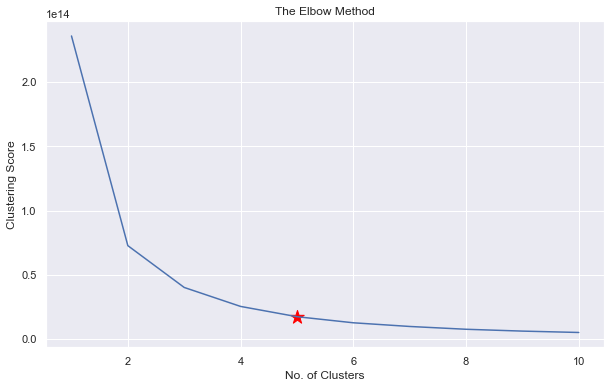

In [ ]:
clustering_score = []
X = df.select_dtypes(np.number)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [549]:
projection.groupby('cluster')['genre'].agg(pd.Series.mode)

cluster
0.0       Pop
1.0    techno
2.0    trance
3.0       Pop
4.0       Emo
Name: genre, dtype: object

In [553]:
projection[projection['cluster']==3].groupby('genre').count().sort_values('cluster',ascending=False).head(3)

,x,y,cluster
genre,,,
Pop,622,622,622
RnB,545,545,545
Emo,289,289,289


In [551]:
projection[projection['cluster']==1].groupby('genre').count().sort_values('cluster',ascending=False).head(3)

,x,y,cluster
genre,,,
techno,2878,2878,2878
techhouse,1900,1900,1900
trance,449,449,449


In [552]:
projection[projection['cluster']==2].groupby('genre').count().sort_values('cluster',ascending=False).head(3)

,x,y,cluster
genre,,,
trance,553,553,553
Emo,377,377,377
Pop,284,284,284


In [153]:
projection.genre.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [157]:
projection[projection['cluster']==3].groupby('genre').count().sort_values('cluster',ascending=False).head(10)

,x,y,cluster
genre,,,
techno,2840,2840,2840
psytrance,2660,2660,2660
trance,1290,1290,1290
techhouse,1272,1272,1272
dnb,656,656,656
Dark Trap,604,604,604
hardstyle,173,173,173
trap,55,55,55
Underground Rap,17,17,17


In [156]:
projection[projection['cluster']==4].groupby('genre').count().sort_values('cluster',ascending=False).head(10)

,x,y,cluster
genre,,,
techhouse,1440,1440,1440
Underground Rap,747,747,747
Rap,471,471,471
RnB,348,348,348
Hiphop,340,340,340
Dark Trap,316,316,316
Trap Metal,219,219,219
Emo,203,203,203
Pop,160,160,160


##  average time of a song


In [520]:
px.box(data_frame=df,y='duration_ms',color='genre')


In [ ]:
#Well we can clearly see that most of the genres have their own time ranges 
#pystrance is mostly longer and we can see that trap music is of lower timespan

# Clean

In [471]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000


# Feature

In [472]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [473]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre'],
      dtype='object')

In [412]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import SelectKBest # Feature selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer


In [775]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre', 'cluster'],
      dtype='object')

In [767]:
X=df.drop(['genre'],axis=1)
y=df['genre']

In [768]:
y.unique()

array(['Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'techno', 'trance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [769]:
le=LabelEncoder()
y=le.fit_transform(y)

In [505]:
y=df['genre']

In [655]:
le.fit(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Emo': 0, 'Pop': 1, 'Rap': 2, 'RnB': 3, 'Trap Metal': 4, 'dnb': 5, 'hardstyle': 6, 'techno': 7, 'trance': 8, 'trap': 9}


In [770]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    train_size=0.75,
    random_state=0)

In [776]:
X.key=X.key.astype('object')
X['mode']=X['mode'].astype('object')
X['cluster']=X['cluster'].astype('object')

In [777]:
cat_feats=X.dtypes[X.dtypes == 'object'].index.tolist()
num_feats=X.dtypes[~X.dtypes.index.isin(cat_feats)].index.tolist()

In [778]:
cat_feats

['key', 'mode', 'cluster']

In [779]:
num_feats

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [780]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'cluster'],
      dtype='object')

In [782]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.utils import class_weight
from sklearn.model_selection import RandomizedSearchCV


## PCA ANALYSIS

In [467]:
# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(df[num_feats])

Text(0.5, 0, 'Principal Component #')

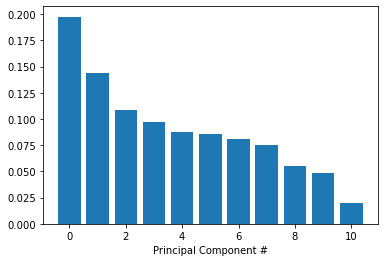

In [179]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_ 

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

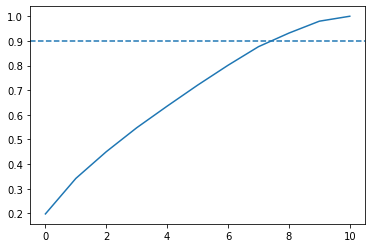

In [181]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(3, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

# Model

In [810]:
basemodel=LogisticRegression( class_weight='balanced')

In [812]:
# basemodel= xgb.XGBClassifier()
preprocess=ColumnTransformer([
    ('scale',StandardScaler(),num_feats),
    ('pc',PCA(n_components=2),num_feats),
    ('selectk',SelectKBest(),num_feats),

    ('onehotencoded',OneHotEncoder(drop='first'),cat_feats)  
    
])

In [813]:

pipeline=imbPipeline(steps=[
                        ('smote',SMOTE('minority')),
                         ("preprocessor",preprocess),
                         ("clf",basemodel)
                         ])

In [815]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms']),
                                                 ('pc', PCA(n_components=2),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms']),
                                                 ('selectk', SelectKBest(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms']),
                                                 ('onehotencoded',
                                                  OneHotEncoder(drop='first'),
                                                  ['key', 'mode',
                                                   'cluster'])])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [ ]:
# pipeline.get_params()

In [816]:
y_pred = pipeline.predict(X_test)

In [793]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       414
           1       0.55      0.61      0.57       863
           2       0.59      0.58      0.58       445
           3       0.47      0.32      0.38       521
           4       0.69      0.70      0.69       486
           5       0.99      0.98      0.99       791
           6       0.91      0.95      0.93       743
           7       0.93      0.94      0.94       745
           8       0.91      0.91      0.91       740
           9       0.91      0.86      0.89       731

    accuracy                           0.79      6479
   macro avg       0.76      0.76      0.76      6479
weighted avg       0.78      0.79      0.78      6479



In [821]:
metrics.f1_score(y_test,y_pred,average='micro')

0.3975922210217626

In [676]:
import pickle


In [543]:
pickle.dump(pipeline,open('pipeline.pkl','wb'))

In [822]:
param_grid = {'clf': [LogisticRegression(), DecisionTreeClassifier(),
                      RandomForestClassifier(),
                        XGBClassifier(),
                        KNeighborsClassifier()]}

In [803]:

parms = { 
    'clf__n_estimators': [100,150,200],
    'clf__criterion':['gini'],
    'clf__min_samples_split': [3,4],
    'clf__min_samples_leaf': [1,2,3],
    'clf__max_leaf_nodes': [4,5,6],

    'clf__max_features':['log2']
}


In [823]:
grid=RandomizedSearchCV(pipeline,param_grid,cv=5,verbose=3)

In [824]:
grid=grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..........clf=LogisticRegression();, score=0.334 total time=   0.7s
[CV 2/5] END ..........clf=LogisticRegression();, score=0.341 total time=   0.7s
[CV 3/5] END ..........clf=LogisticRegression();, score=0.340 total time=   0.6s
[CV 4/5] END ..........clf=LogisticRegression();, score=0.349 total time=   0.7s
[CV 5/5] END ..........clf=LogisticRegression();, score=0.331 total time=   0.6s
[CV 1/5] END ......clf=DecisionTreeClassifier();, score=0.692 total time=   0.6s
[CV 2/5] END ......clf=DecisionTreeClassifier();, score=0.696 total time=   0.6s
[CV 3/5] END ......clf=DecisionTreeClassifier();, score=0.711 total time=   0.6s
[CV 4/5] END ......clf=DecisionTreeClassifier();, score=0.710 total time=   0.6s
[CV 5/5] END ......clf=DecisionTreeClassifier();, score=0.704 total time=   0.6s
[CV 1/5] END ......clf=RandomForestClassifier();, score=0.773 total time=   5.9s
[CV 2/5] END ......clf=RandomForestClassifier();,

In [825]:
y_pred=grid.predict(X_test)

In [830]:
metrics.f1_score(y_test,y_pred,average='micro')

0.7930236147553635

In [832]:
grid.score(X_test,y_test)

0.7930236147553635

In [833]:
accuracy_score(y_test,y_pred)

0.7930236147553635

In [834]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       414
           1       0.54      0.58      0.56       863
           2       0.59      0.59      0.59       445
           3       0.46      0.39      0.42       521
           4       0.71      0.69      0.70       486
           5       0.99      0.98      0.99       791
           6       0.92      0.96      0.94       743
           7       0.94      0.94      0.94       745
           8       0.94      0.92      0.93       740
           9       0.92      0.89      0.91       731

    accuracy                           0.79      6479
   macro avg       0.77      0.77      0.77      6479
weighted avg       0.79      0.79      0.79      6479



In [527]:
pickle.dump(grid,open('pipeline.pkl','wb'))

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
grid.score(X_test,y_test)